# Comparing STEM and non-STEM GPAs at UW Madison since 2006

This notebook performs a SQL query on the UW Madison database and does a hypothesis test comparing STEM and non-STEM classes. STEM classes are defined by which subjects have their books in the Teaching and Learning Research Guide for STEM and SBE libraries: https://researchguides.library.wisc.edu/teaching_learning

$H_0$ = There is no difference between GPAs of STEM and non-STEM classes

$H_A$ = There is a difference between the GPAs of STEM and non-STEM classes

---

## Import necessary Python libraries and modules

In [1]:
from sqlalchemy import create_engine
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Query the database and create dataframes of STEM and non-STEM classes

In [2]:
engine = create_engine('postgresql:///uw_madison')

In [3]:
stem_query = """SELECT * FROM stem_classes;"""

In [4]:
stem_df = pd.read_sql(stem_query, engine)
stem_df.describe()

,section_number,section_gpa
count,29263.000000,29263.000000
mean,3.876260,3.385967
std,10.121531,0.379954
min,1.000000,0.000000
25%,1.000000,3.117647
50%,1.000000,3.416667
75%,2.000000,3.700000
max,296.000000,3.996622


In [5]:
non_stem_query = """SELECT * FROM non_stem_classes;"""

In [6]:
non_stem_df = pd.read_sql(non_stem_query, engine)
non_stem_df.describe()

,section_number,section_gpa
count,57333.000000,57333.000000
mean,5.135350,3.517342
std,12.715356,0.325315
min,1.000000,0.000000
25%,1.000000,3.300000
50%,1.000000,3.562500
75%,3.000000,3.789474
max,271.000000,3.998418


## Remove the classes where the average GPA is 4.0

In [7]:
stem_df = stem_df.loc[stem_df['section_gpa'] != 4.0]['section_gpa']
stem_df.describe()

count    29263.000000
mean         3.385967
std          0.379954
min          0.000000
25%          3.117647
50%          3.416667
75%          3.700000
max          3.996622
Name: section_gpa, dtype: float64

In [8]:
non_stem_df = non_stem_df.loc[non_stem_df['section_gpa'] != 4.0]['section_gpa']
non_stem_df.describe()

count    57333.000000
mean         3.517342
std          0.325315
min          0.000000
25%          3.300000
50%          3.562500
75%          3.789474
max          3.998418
Name: section_gpa, dtype: float64

## Choose 2,000 random classes from each population to do hypothesis testing on

In [9]:
stem_choice = np.random.choice(stem_df, size=2000, replace=False)
non_stem_choice = np.random.choice(non_stem_df, size=2000, replace=False)

## Generate histogram plots for GPAs

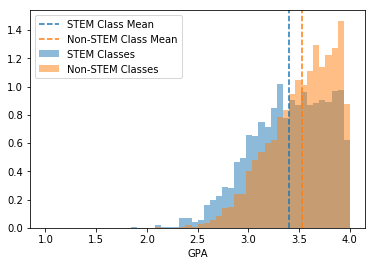

In [10]:
fig, ax = plt.subplots()
ax.hist(stem_choice, density=True, color='#1f77b4', alpha=0.5, bins=50, range=(1.0, 4.0), label='STEM Classes')
ax.axvline(stem_choice.mean(), color='#1f77b4', alpha=1, linestyle='dashed',label='STEM Class Mean')
ax.hist(non_stem_choice, density=True, color='#ff7f0e', alpha=0.5, bins=50, range=(1.0, 4.0), label='Non-STEM Classes')
ax.axvline(non_stem_choice.mean(), color='#ff7f0e', alpha=1, linestyle='dashed', label='Non-STEM Class Mean')
ax.legend()
ax.set_xlabel('GPA');

## Perform statistical testing for the hypothesis

In [11]:
stats.ttest_ind(stem_choice, non_stem_choice, equal_var=False)

Ttest_indResult(statistic=-11.595118593138709, pvalue=1.377867556258258e-30)

The T-statistic and shapes of the histograms show that the GPAs for STEM and non-STEM classes are different and the p-value shows that the differences are significant.

As such, we reject the null hypothesis.